In [67]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 
print(data_breast_cancer['data'])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [68]:
X, y = data_breast_cancer['data'], data_breast_cancer['target']

In [69]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)
tree_clf = DecisionTreeClassifier(max_depth=4,
random_state=38)
tree_clf.fit(X_train, y_train)
pred_test = tree_clf.predict(X_test)
pred_train = tree_clf.predict(X_train)
from sklearn.metrics import f1_score
f1_train, f1_test = f1_score(pred_train, y_train), f1_score(pred_test, y_test)
print(f1_score(pred_test, y_test), f1_score(pred_train, y_train))
score_train, score_test = tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)
print(tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test))


0.9620253164556962 0.9858657243816255
0.9824175824175824 0.9473684210526315


In [70]:
import pickle
pickle.dump([4, f1_train, f1_test, score_train, score_test], open("f1acc_tree.pkl", "wb"))

In [71]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
        tree_clf,
        out_file='bc',
        feature_names=data_breast_cancer['data'].columns,
        rounded=True,
        filled=True)
graph = graphviz.Source.from_file('bc')
graph
graph.render(format='png', directory='.')

'.\\bc.png'

In [72]:
###REGRESJA

<AxesSubplot:xlabel='x', ylabel='y'>

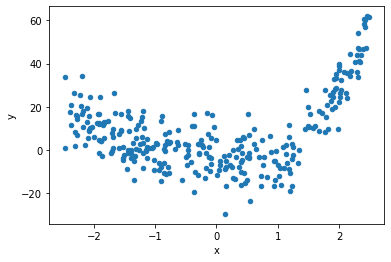

In [73]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size=0.2, random_state=499)
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=499)
tree_reg.fit(X_train, y_train)
pred_train = tree_reg.predict(X_train)
pred_test = tree_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(mse_train, mse_test)

49.51147402302659 85.6320521987017


In [75]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
        tree_reg,
        out_file='reg',
        rounded=True,
        filled=True)
graph = graphviz.Source.from_file('reg')
graph
graph.render(format='png', directory='.')

'.\\reg.png'

In [76]:
import pickle
pickle.dump([5, mse_train, mse_test], open("mse_tree.pkl", "wb"))